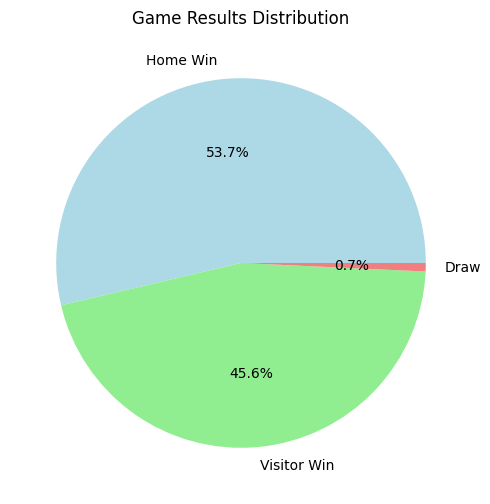

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('..\..\Dataset\games.csv')

# 计算比赛结果：主队获胜、客队获胜或平局
data['Result'] = data.apply(lambda row: 'Home Win' if row['homeFinalScore'] > row['visitorFinalScore']
                            else 'Visitor Win' if row['homeFinalScore'] < row['visitorFinalScore']
                            else 'Draw', axis=1)

# 创建比赛结果分布统计图（饼图）
result_counts = data['Result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Game Results Distribution')
plt.show()


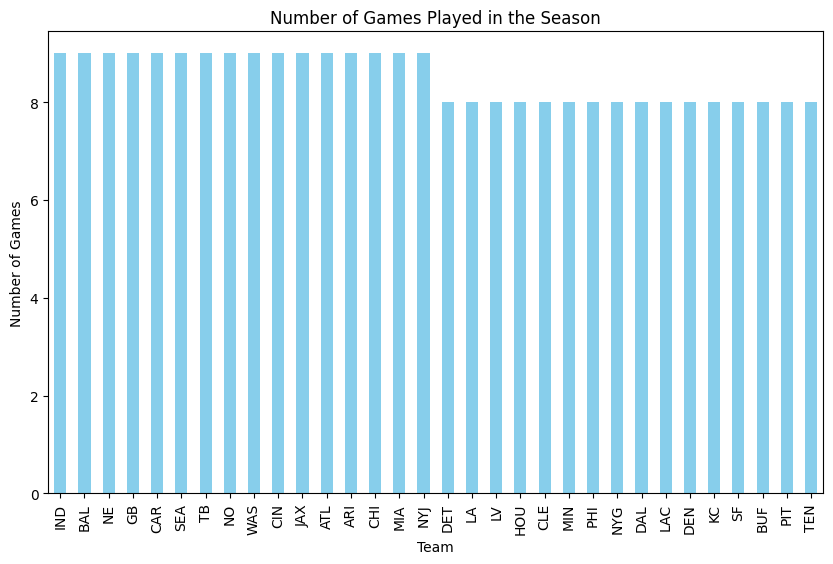

In [3]:
# 计算每支球队在整个赛季中参加的比赛数量
team_counts = pd.concat([data['homeTeamAbbr'], data['visitorTeamAbbr']]).value_counts()

# 创建赛季内比赛次数统计的柱状图
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games Played in the Season')
plt.xlabel('Team')
plt.ylabel('Number of Games')
plt.show()


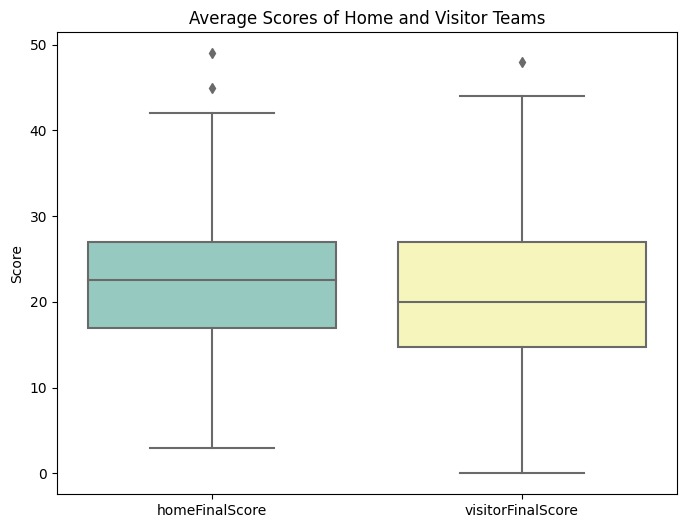

In [4]:
# 创建主队和客队的平均得分统计的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['homeFinalScore', 'visitorFinalScore']], palette='Set3')
plt.title('Average Scores of Home and Visitor Teams')
plt.ylabel('Score')
plt.show()

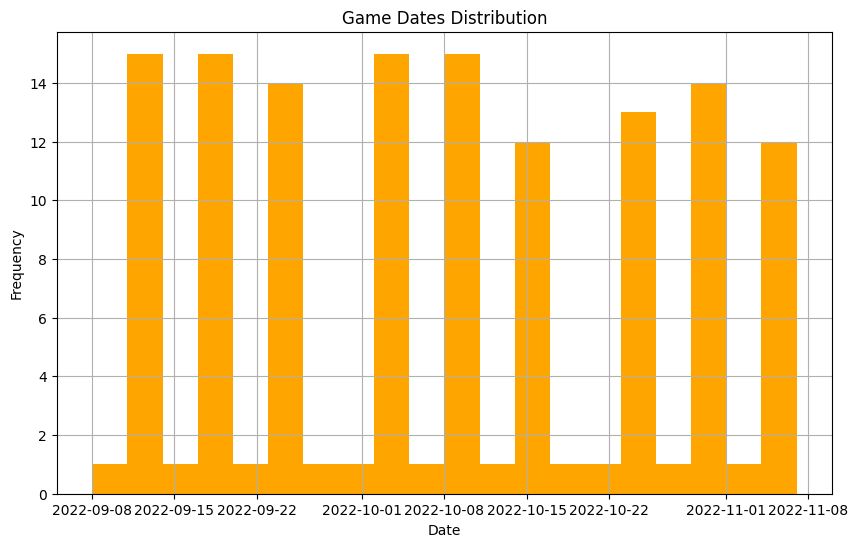

In [5]:
# 将日期转换为日期时间格式
data['gameDate'] = pd.to_datetime(data['gameDate'])

# 创建比赛日期和时间的分布情况的时间序列图表
plt.figure(figsize=(10, 6))
data['gameDate'].hist(bins=20, color='orange')
plt.title('Game Dates Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


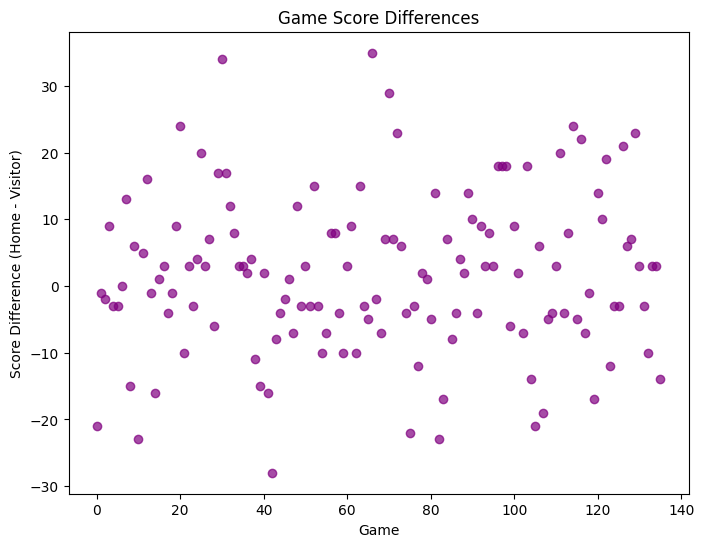

In [6]:
# 5. 比赛得分差异的分析（散点图）
data['ScoreDifference'] = data['homeFinalScore'] - data['visitorFinalScore']
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['ScoreDifference'], color='purple', alpha=0.7)
plt.title('Game Score Differences')
plt.xlabel('Game')
plt.ylabel('Score Difference (Home - Visitor)')
plt.show()

主场每周胜场数

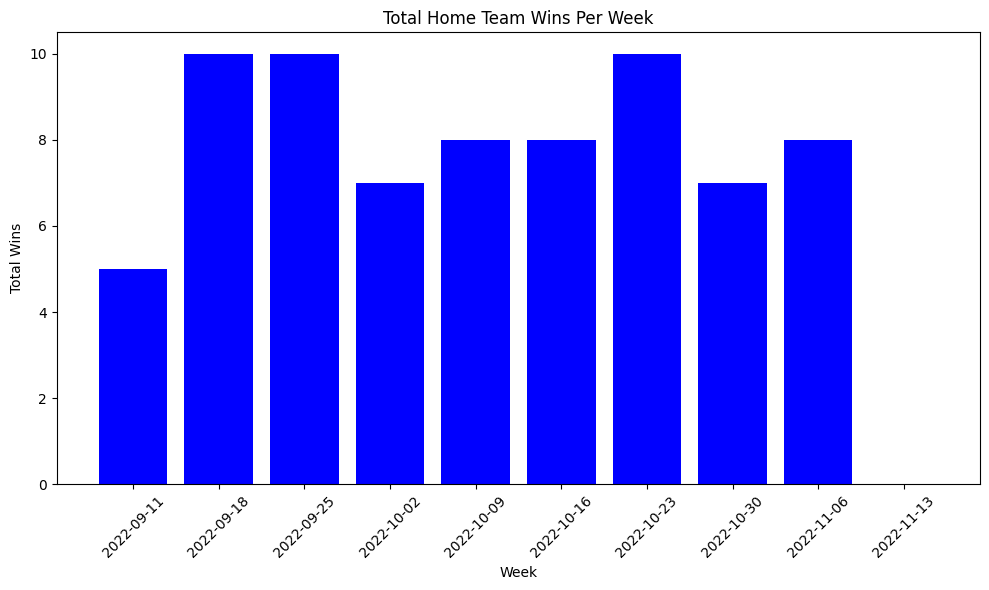

In [7]:
# 将 'gameDate' 转换为日期时间格式
data['Date'] = pd.to_datetime(data['gameDate'])

# 创建主队胜利的标志列 'HomeWin'
data['HomeWin'] = (data['homeFinalScore'] > data['visitorFinalScore']).astype(int)

# 按周对主队赢得比赛的数量进行累积求和
data['Week'] = data['Date'].dt.to_period('W')
weekly_wins = data.groupby('Week')['HomeWin'].cumsum()

# 插入 'CumulativeWins' 列到数据集中
data['CumulativeWinsWeekly'] = weekly_wins

# 计算每周主队赢得比赛的总数
weekly_total_wins = data.groupby('Week')['HomeWin'].sum()

# 绘制条形统计图
plt.figure(figsize=(10, 6))
plt.bar(weekly_total_wins.index.strftime('%Y-%m-%d'), weekly_total_wins, color='blue')
plt.title('Total Home Team Wins Per Week')
plt.xlabel('Week')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

每周比赛数

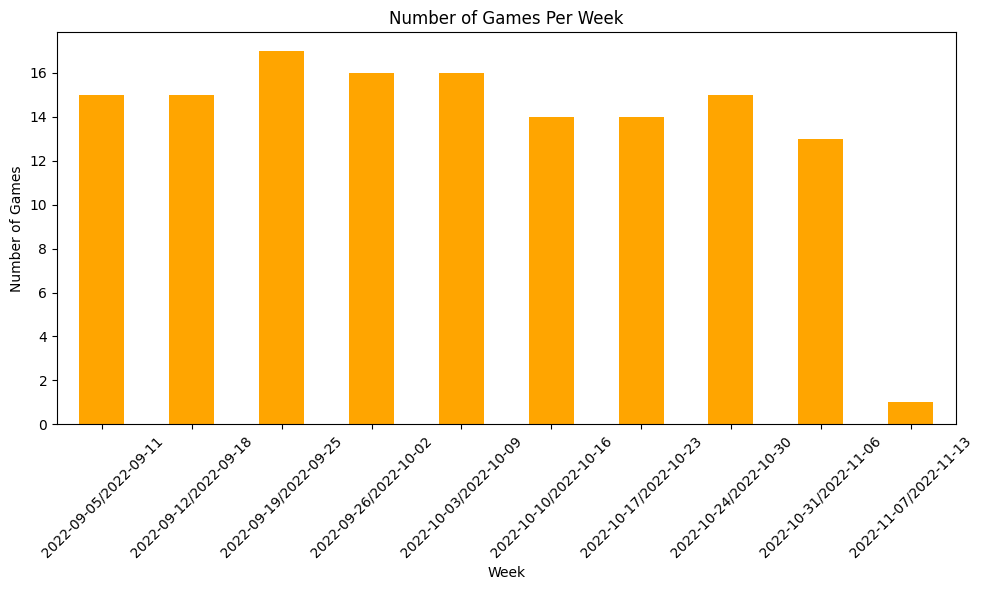

每周比赛数量的统计描述：
count    10.000000
mean     13.600000
std       4.575296
min       1.000000
25%      14.000000
50%      15.000000
75%      15.750000
max      17.000000
Name: Date, dtype: float64


In [8]:
# 将 'gameDate' 转换为日期时间格式
data['Date'] = pd.to_datetime(data['gameDate'])

# 按周统计比赛数量
weekly_games_count = data['Date'].dt.to_period('W').value_counts().sort_index()

# 绘制直方图显示每周的比赛数量分布
plt.figure(figsize=(10, 6))
weekly_games_count.plot(kind='bar', color='orange')
plt.title('Number of Games Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 显示统计描述信息
print("每周比赛数量的统计描述：")
print(weekly_games_count.describe())

按周统计主场胜率

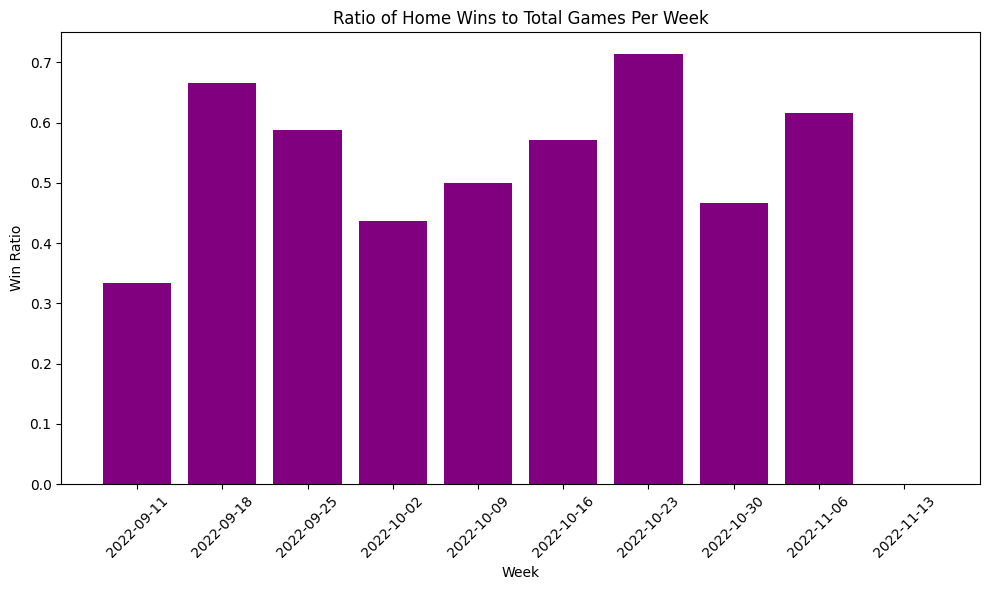

In [9]:
# 将 'gameDate' 转换为日期时间格式
data['Date'] = pd.to_datetime(data['gameDate'])

# 创建主队胜利的标志列 'HomeWin'
data['HomeWin'] = (data['homeFinalScore'] > data['visitorFinalScore']).astype(int)

# 按周对主队赢得比赛的数量进行累积求和
data['Week'] = data['Date'].dt.to_period('W')
weekly_wins = data.groupby('Week')['HomeWin'].sum()

# 按周统计比赛数量
weekly_games_count = data['Date'].dt.to_period('W').value_counts().sort_index()

# 计算每周主对胜场数与每周总比赛数的比值
weekly_win_ratio = weekly_wins / weekly_games_count

# 绘制条形统计图
plt.figure(figsize=(10, 6))
plt.bar(weekly_win_ratio.index.strftime('%Y-%m-%d'), weekly_win_ratio, color='purple')
plt.title('Ratio of Home Wins to Total Games Per Week')
plt.xlabel('Week')
plt.ylabel('Win Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()